### Problem Description and Dataset
---

Objective: To gain a comprehensive understanding of seasonality and trends in the Natural Gas Futures market.

The data used as sample is taken from the Henry Hub Natural Gas Spot Price and Futures Contract 1 price.

Available at:

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
from pylab import rcParams

In [141]:
raw_data = pd.read_excel("RNGC1d.xls", sheet_name="Data 1", skiprows=2)

In [142]:
raw_data.head()

,Date,Natural Gas Futures Contract 1 (Dollars per Million Btu)
0,1994-01-13,2.194
1,1994-01-14,2.268
2,1994-01-17,2.360
3,1994-01-18,2.318
4,1994-01-19,2.252


In [143]:
raw_data.tail()

,Date,Natural Gas Futures Contract 1 (Dollars per Million Btu)
7325,2023-03-15,2.439
7326,2023-03-16,2.514
7327,2023-03-17,2.338
7328,2023-03-20,2.223
7329,2023-03-21,2.348


In [144]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330 entries, 0 to 7329
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Date                                                      7330 non-null   datetime64[ns]
 1   Natural Gas Futures Contract 1 (Dollars per Million Btu)  7330 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 114.7 KB


* We have a data set with daily closing prices for the Henry Hub Natural Gas Future Contract 1 from 1994-2023

* Data Types are appropiate for both Date and Price Collumns

### EDA

In [145]:
df = raw_data.copy()

In [146]:
df = df.rename(columns={'Natural Gas Futures Contract 1 (Dollars per Million Btu)':'NG1!'})

In [147]:
df = df.set_index("Date")

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NG1!,7330.0,4.062633,2.219353,1.323,2.47425,3.342,5.082,15.378


Missing Values

In [149]:
df.isna().any().sum()

0

* There Are No Missing Values in the Time Series

Visualization


<AxesSubplot: xlabel='Date'>

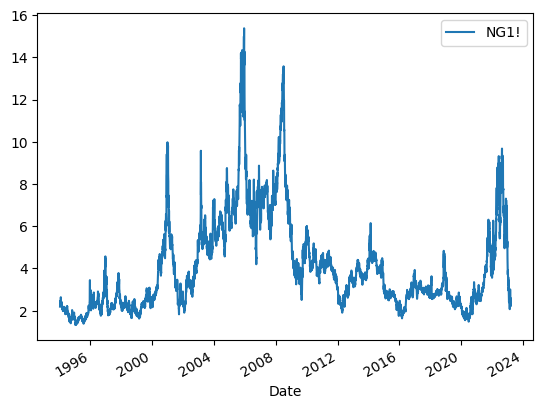

In [150]:
df.plot()

### Seasonal Decomposition

In [151]:
NG = df.copy()
NG.head(2)

,NG1!
Date,
1994-01-13,2.194
1994-01-14,2.268


In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [153]:
NG

,NG1!
Date,
1994-01-13,2.194
1994-01-14,2.268
1994-01-17,2.360
1994-01-18,2.318
1994-01-19,2.252
...,...
2023-03-15,2.439
2023-03-16,2.514
2023-03-17,2.338


In [154]:
NG = NG.asfreq('d')

In [155]:
NG

,NG1!
Date,
1994-01-13,2.194
1994-01-14,2.268
1994-01-15,NaN
1994-01-16,NaN
1994-01-17,2.360
...,...
2023-03-17,2.338
2023-03-18,NaN
2023-03-19,NaN


In [156]:
NG['NG1!'] = NG['NG1!'].interpolate()

<AxesSubplot: xlabel='Date'>

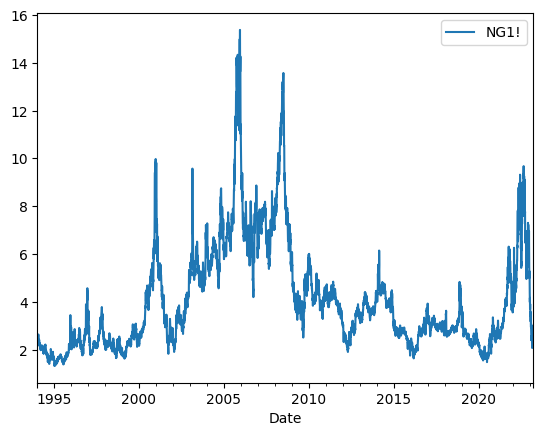

In [157]:
NG.plot()

In [158]:
NG1M = NG.resample('M', convention='end').asfreq()

In [159]:
NG1M = NG1M.dropna()

In [160]:
result = seasonal_decompose(NG[NG.index.year.isin([2019,2020,2021,2021,2022,2023])], model='additive', period=30)

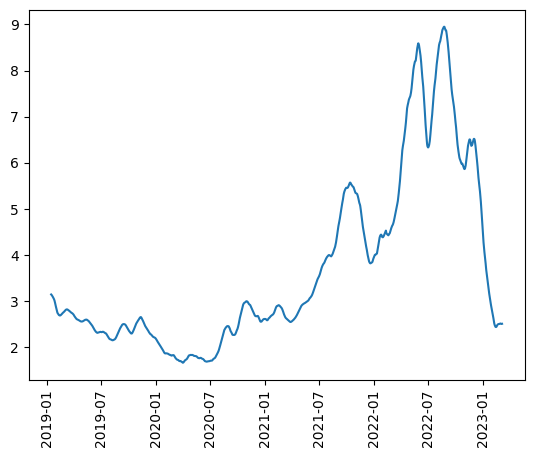

In [161]:
plt.plot(result.trend)
plt.xticks(rotation=90)
plt.show()

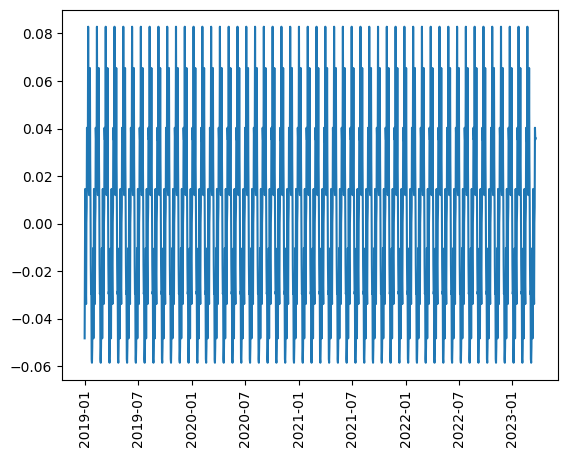

In [166]:
plt.plot(result.seasonal.)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='Date'>

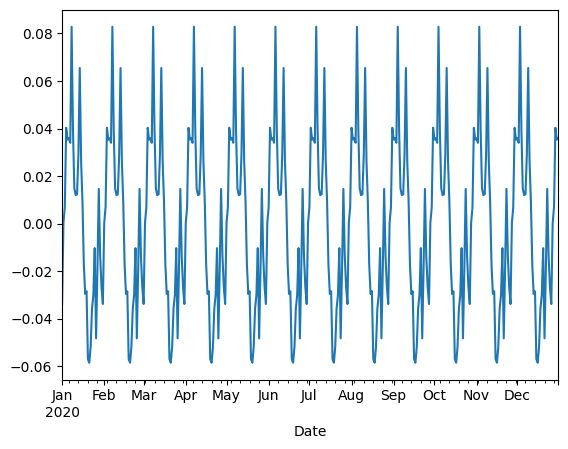

In [172]:
result.seasonal.loc['2020-01-01':'2020-12-31'].plot()

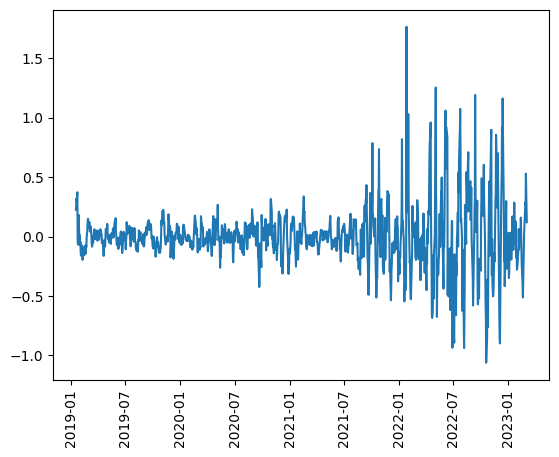

In [163]:
plt.plot(result.resid)
plt.xticks(rotation=90)
plt.show()

Date
1994-03-31    AxesSubplot(0.125,0.11;0.775x0.77)
1994-06-30    AxesSubplot(0.125,0.11;0.775x0.77)
1994-09-30    AxesSubplot(0.125,0.11;0.775x0.77)
1994-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
1995-03-31    AxesSubplot(0.125,0.11;0.775x0.77)
                             ...                
2022-03-31    AxesSubplot(0.125,0.11;0.775x0.77)
2022-06-30    AxesSubplot(0.125,0.11;0.775x0.77)
2022-09-30    AxesSubplot(0.125,0.11;0.775x0.77)
2022-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
2023-03-31    AxesSubplot(0.125,0.11;0.775x0.77)
Freq: Q-DEC, Name: NG1!, Length: 117, dtype: object

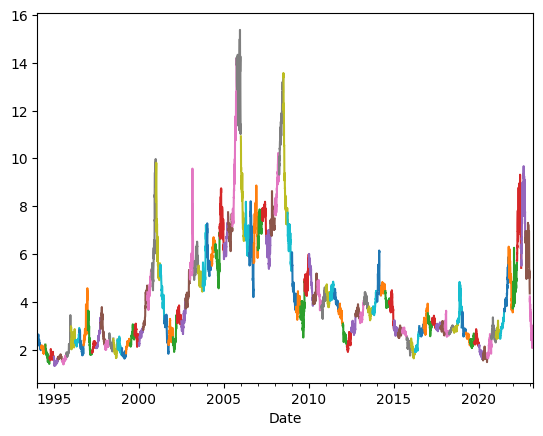

In [164]:
NG.resample("Q")['NG1!'].plot()